# The  Ideal Rankine Cycle Analysis

Chapter 8 : Vapor Power Systems:

EXAMPLE 8.1 Analyzing an Ideal Rankine Cycle P438

* 1 expression only

* 2 the basic abstraction :List dict,function

* 3 [Object-oriented programming](./Unit4-1-PyThermo-IdealRankineCycle-OOP.ipynb)

EXAMPLE 8.2 Analyzing a Rankine Cycle with Irreversibilities P444

*  expression only

## 1  Example 8.1: Analyzing an Ideal Rankine Cycle 

Steam is the working fluid in an ideal Rankine cycle. 

Saturated vapor enters the turbine at 8.0 MPa and saturated liquid exits the condenser at a pressure of 0.008 MPa. 

The net power output of the cycle is 100 MW.

![rankine81](./img/rankine81.jpg)

* **Process 1–2:** **Isentropic expansion** of the working fluid through the turbine from saturated vapor at state 1 to the condenser pressure.
* **Process 2–3:** Heat transfer from the working fluid as it flows at **constant pressure**
through the condenser with saturated liquid at state 3.
* **Process 3–4:** **Isentropic compression** in the pump to state 4 in the compressed liquid region.
* **Process 4–1:** Heat transfer to the working fluid as it flows at **constant pressure** through the boiler to complete the cycle.

Determine for the cycle

(a) the thermal efficiency,

(b) the back work ratio, 

(c) the mass flow rate of the steam,in kg/h,

(d) the rate of heat transfer, Qin, into the working fluid as it passes through the boiler, in MW,

(e) the rate of heat transfer, Qout, from the condensing steam as it passes through the condenser, in MW,

(f) the mass flow rate of the condenser cooling water, in kg/h, if cooling water enters the condenser at 15°C and exits at 35°C.

### Engineering Model:

* 1 Each **component** of the cycle is analyzed as a **control volume** at steady state. The control volumes are shown on the accompanying sketch by **dashed** lines.


* 2 All processes of the working fluid are internally reversible.


* 3 The turbine and pump operate adiabatically.


* 4 Kinetic and potential energy effects are negligible.


* 5 Saturated vapor enters the turbine. Condensate exits the condenser as saturated liquid.

### 1.1 Analysis with expression directly- Zero Abstraction

To begin the analysis, we fix each of **the principal states（1，2，3，4)** located on the accompanying schematic and **T–s** diagrams.

In [ ]:
from seuif97 import *

# State  1
p1 = 8.0               #  in MPa
t1 =px2t(p1,1) 
h1=px2h(p1,1)          # h1 = 2758.0    From table A-3  kj/kg
s1=px2s(p1,1)          # s1 = 5.7432    From table A-3  kj/kg.k

# State  2 ,p2=0.008
p2=0.008
s2 = s1
t2 =ps2t(p2,s2)     
h2 =ps2h(p2,s2)     

# State 3 is saturated liquid at 0.008 MPa
p3 = 0.008            
t3=px2t(p3,0) 
h3 =px2h(p3,0)                                     #  kj/kg
s3 =px2s(p3,0)     

#State 4 
p4 = p1
s4=s3
h4 =ps2h(p4,s4)     
t4 =ps2h(p4,s4)  

### (a) The thermal efficiency

The net power developed by the cycle is

$\dot{W}_{cycle}=\dot{W}_t-\dot{W}_p$

Mass and energy rate balances for control volumes around the turbine and pump give,respectively

$\frac{\dot{W}_t}{\dot{m}}=h_1-h_2$  
$\frac{\dot{W}_p}{\dot{m}}=h_4-h_3$

where $\dot{m}$ is the mass flow rate of the steam. The rate of heat transfer to the working fluid as it passes through the boiler is determined using mass and energy rate balances as

$\frac{\dot{Q}_{in}}{\dot{m}}=h_1-h_4$

The thermal efficiency is then


$\eta=\frac{\dot{W}_t-\dot{W}_p}{\dot{Q}_{in}}=\frac{(h_1-h_2)-(h_4-h_3)}{h_1-h_4}$


In [ ]:
# Part(a)
# Mass and energy rate balances for control volumes 
# around the turbine and pump give, respectively

# turbine
wtdot = h1 - h2
# pump
wpdot = h4-h3

# The rate of heat transfer to the working fluid as it passes 
# through the boiler is determined using mass and energy rate balances as
qindot = h1-h4

# thermal efficiency
eta = (wtdot-wpdot)/qindot   

# Result for part a
print('(a) The thermal efficiency for the cycle is %.2f%%' %(eta*100))

**(b)** The back work ratio is

$bwr=\frac{\dot{W}_p}{\dot{W}_t}=\frac{h_4-h_3}{h_1-h_2}$

**(c)** The mass flow rate of the steam can be obtained from the expression for the net power given in part (a). Thus

$\dot{m}=\frac{\dot{W}_{cycle}}{(h_1-h_2)-(h_4-h_3)}$

**(d)** With the expression for $\dot{Q}_{in}$ in from part (a) and previously determined specific enthalpy values

$\dot{Q}_{in}=\dot{m}(h_1-h_4)$

**(e)** Mass and energy rate balances applied to a control volume enclosing the steam side of the condenser give

$\dot{Q}_{out}=\dot{m}(h_2-h_3)$

**(f)** Taking a control volume around the condenser, the mass and energy rate balances give at steady state


$\require{cancel} 0=\dot{\cancel{Q}}^{0}_{cv}-\dot{\cancel{w}}^{0}_{cv}+\dot{m}_{cw}(h_{cw,in}-h_{cw,out})+\dot{m}(h_2-h_3)$

where $\dot{m}_{cw}$ is the mass flow rate of the cooling water. Solving for $\dot{m}_{cw}$

 $\dot{m}_{cw}=\frac{\dot{m}(h_2-h_3)}{h_{cw,in}-h_{cw,out}}$

In [ ]:
# Part(b)
# back work ratio：bwr, defined as the ratio of the pump work input to the work 
# developed by the turbine.
bwr = wpdot/wtdot                                    # 

# Result
print('(b) The back work ratio is %.3f%%'%(bwr*100))

# Part(c)
Wcycledot = 100.00     # the net power output of the cycle in MW
mdot = (Wcycledot*10**3*3600)/((h1-h2)-(h4-h3))       # mass flow rate in kg/h

# Result 
print('(c) The mass flow rate of the steam is %.2f' %mdot,'kg/h.')
 
# Part(d)
Qindot = mdot*qindot/(3600*10**3)                     # in MW

# Results
print('(d) The rate of heat transfer Qindot into the working fluid as'+
      ' it passes through the boiler is %.2f' %Qindot,'MW.')

# Part(e)
Qoutdot = mdot*(h2-h3)/(3600*10**3)                   # in MW

# Results
print('(e) The rate of heat transfer Qoutdot from the condensing steam '+
      'as it passes through the condenser is {:.2f} MW.'.format(Qoutdot))

# Part(f)
# Given: 
tcwin=15
tcwout=35

hcwout=tx2h(tcwout,0)   # From table A-2,hcwout= 146.68  kj/kg  

hcwin= tx2h(tcwin,0)    # hcwin 62.99  
mcwdot= (Qoutdot*10**3*3600)/(hcwout-hcwin)          # in kg/h

# Results
print('(f) The mass flow rate of the condenser cooling water is %.2f kg/h.'%mcwdot )

### 1.2 Analyzing the Ideal Rankine Cycle with the basic abstraction 

* **List,Dict,Function**

The ideal rankine cycle:
```
   
    ----Node 0---Turbine---Node 1----
    |                               |
  Boiler                          Condenser
    |                               |
    ----Node 3---Pump------Node 2---- 
```
 States, Devices, Rankine Cycle

##### 1 States

In [ ]:
from seuif97 import *

# Analysis: fix each of the principal states   （1,2,3,4)  ->   Nodes    (0,1,2,3)

def FixeNodesState(Nodes):
   
    # State  1, Node 0
    Nodes[0]['p'] = 8.0   
    p=Nodes[0]['p']
    Nodes[0]['t']=px2t(p,1)
    Nodes[0]['h']=px2h(p,1)        
    Nodes[0]['s']=px2s(p,1)         

    # State  2, Node 1
    Nodes[1]['p']=0.008
    Nodes[1]['s'] = Nodes[0]['s']
    p= Nodes[1]['p']
    s= Nodes[1]['s']    
    Nodes[1]['t']=ps2t(p,s)     
    Nodes[1]['h'] =ps2h(p,s)  

    # State 3 , Node 2 saturated liquid at 0.008 MPa
    Nodes[2]['p'] = 0.008  
    p=Nodes[2]['p'] 
    Nodes[2]['t'] =px2t(p,0) 
    Nodes[2]['h'] =px2h(p,0)                                     
    Nodes[2]['s'] =px2s(p,0)   

    #State 4 , Node 3
    Nodes[3]['p'] = Nodes[0]['p']
    Nodes[3]['s']=  Nodes[2]['s']
    p= Nodes[3]['p']
    s= Nodes[3]['s']
    Nodes[3]['h'] =ps2h(p,s)     
    Nodes[3]['t'] =ps2t(p,s)  
    
    return  Nodes

In [ ]:
Nodes=[{} for i in range(4)]
Nodes=FixeNodesState(Nodes)

print('{:^6}\t {:^7}  {:^7}  {:^7}  {:^7}'.format("Node", "P(MPa)", "T(°C)", "H(kJ/kg)", "S(kJ/kg.K)"))
i=0
for node in  Nodes:
    print('{:^6d} \t {:>5.3f} {:>9.2f} {:>10.2f} {:>9.3f}'.format(i, node['p'],  node['t'],  node['h'],  node['s']))
    i+=1

##### 2 Devices


The ideal rankine cycle:
```
   
    ----Node 0---Turbine---Node 1----
    |                               |
  Boiler                          Condenser
    |                               |
    ----Node 3---Pump------Node 2---- 
```


In [ ]:
def CalDevices(Nodes):
    # Boiler
    Boiler={'min':Nodes[3],'mout':Nodes[0],'qindot':None}
    Boiler['qindot']=Boiler['mout']['h']-Boiler['min']['h']
    
    # Turbine
    Turbine={'min':Nodes[0],'mout':Nodes[1],'wdot':None}       
    Turbine['wdot']=  Turbine['min']['h']- Turbine['mout']['h']        
    
    # Pump
    Pump = {'min': Nodes[2], 'mout': Nodes[3], 'wdot': None}
    Pump['wdot']=  Pump['mout']['h']- Pump['min']['h'] 
    return Boiler,Turbine,Pump 

##### 3 Rankine Cycle

In [ ]:
def CalCycle(Boiler,Turbine,Pump,Cycle):
    # thermal efficiency
    Cycle['eta'] = (Turbine['wdot'] -Pump['wdot'])/  Boiler['qindot']    
    # Part(b)
    Cycle['bwr'] =Turbine['wdot']/Pump['wdot']                                   
    # Part(c)
    Cycle['mdot'] = (Cycle['Wdot']*10**3*3600)/(Turbine['wdot']- Pump['wdot'])       # mass flow rate in kg/h
    # Part(d)
    Boiler['Qindot'] = Cycle['mdot']*Boiler['qindot']/(3600*10**3)                   
    Cycle['Qindot']=Boiler['Qindot']

##### 4 Analysis

* pprint — Data pretty printer https://docs.python.org/3/library/pprint.html

In [ ]:
Nodes=[{} for i in range(4)]
Nodes=FixeNodesState(Nodes)

Boiler,Turbine,Pump=CalDevices(Nodes)

Cycle={'Wdot':100.0}
CalCycle(Boiler,Turbine,Pump,Cycle)

print('(a) The thermal efficiency for the cycle is %.3f '%(Cycle['eta']*100),'%\n')

import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(Cycle)
pp.pprint(Boiler)
pp.pprint(Turbine)
pp.pprint(Pump)

#####  5 Plot T-s Diagram

##### The Simple T-s Diagram

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.figure()

# saturated vapor and liquid entropy lines 
npt = np.linspace(10,647.096-273.15,200) # range of temperatures
svap = [s for s in [tx2s(t, 1) for t in npt]]
sliq = [s for s in [tx2s(t, 0) for t in npt]]
plt.plot(svap, npt, 'r-')
plt.plot(sliq, npt, 'b-')

t=[Nodes[i]['t'] for i in range(4)]
s=[Nodes[i]['s'] for i in range(4)]

# point 5
t.append(px2t(Nodes[0]['p'],0))
s.append(px2s(Nodes[0]['p'],0))

t.append(Nodes[0]['t'])
s.append(Nodes[0]['s'])

#t=[t[0],t[1],t[2],t[3],t[4],t[0]] 
#s=[s[0],s[1],s[2],s[3],s[4],s[0]]

plt.plot(s, t, 'g-')

tist=[t[1],t[1]]
sist=[s[1],px2s(Nodes[1]['p'],1)]
plt.plot(sist, tist, 'y-')


plt.xlabel('Entropy (kJ/(kg K)')
plt.ylabel('Temperature (°C)')
plt.grid()
plt.show()

##### The pretty T-S Diagram with Chinese and annotate

* set fonts, Windows only for Chinese: FangSong or simfang

* annotate

In [ ]:
from seuif97 import *
#from matplotlib.font_manager import * 
from matplotlib import rcParams # figure Params
import matplotlib.pyplot as plt
import numpy as np

def PlotTSDiagram(States):

    # set fonts, Windows only for Chinese: FangSong or simfang
    rcParams['font.family'] = 'sans-serif'
    rcParams['font.sans-serif']=['FangSong'] # Chinese-FangSong

    rcParams['axes.unicode_minus']=False

    # optional-chinese
    #myfont=FontProperties(fname='C:/Windows/Fonts/simfang.ttf') 

    #plt.figure()
    plt.figure(figsize=(10.0,5.0)) # figsize :set figure size

    # saturated vapor and liquid entropy lines 
    npt = np.linspace(10,647.096-273.15,200) # range of temperatures
    svap = [s for s in [tx2s(t, 1) for t in npt]] # saturated vapor tx2s(t, 1),x=1
    sliq = [s for s in [tx2s(t, 0) for t in npt]] # saturated liquid tx2s(t, 0),x=0
    plt.plot(svap, npt, 'r-')
    plt.plot(sliq, npt, 'b-')

    t=[Nodes[i]['t'] for i in range(4)]
    s=[Nodes[i]['s'] for i in range(4)]

    # States[3]['t'] is slightly larger than States[2]['t'] , points States[2] and States[3] are almost overlap if drawing with real values
    # so,adjust the value of States[3]['t'] ,using the virtual values to eliminate drawing overlap
    t[3]=States[3]['t']+8

    # point 5
    t.append(px2t(Nodes[0]['p'],0))
    s.append(px2s(Nodes[0]['p'],0))

    t.append(Nodes[0]['t'])
    s.append(Nodes[0]['s'])

    plt.plot(s, t, 'go-')

    plt.annotate('1 ({:.2f},{:.2f})'.format(s[0],t[0]),
                 xy=(s[0],t[0]), xycoords='data',
                 xytext=(+2, +5), textcoords='offset points', fontsize=12)

    plt.annotate('2 ({:.2f},{:.2f})'.format(s[1],t[1]),
                 xy=(s[1], t[1]), xycoords='data',
                 xytext=(+2, +5), textcoords='offset points', fontsize=12)

    plt.annotate('3 ({:.2f},{:.2f})'.format(s[2],t[2]),
                 xy=(s[2], t[2]), xycoords='data',
                 xytext=(+10, +5), textcoords='offset points', fontsize=12)

    plt.annotate('4 ({:.2f},{:.2f})'.format(s[3],t[3]-8),
                 xy=(s[3], t[3]), xycoords='data',
                 xytext=(+10, +25), textcoords='offset points', fontsize=12)


    plt.annotate('5 ({:.2f},{:.2f})'.format(s[4],t[4]),
                 xy=(s[4], t[4]), xycoords='data',
                 xytext=(-60, +5), textcoords='offset points', fontsize=12)

    
    tist=[t[1],t[1]]
    sist=[s[1],px2s(Nodes[1]['p'],1)]
    plt.plot(sist, tist, 'y-')
    
    #plt.title('T-s: Ideal Rankine Cycle')
    plt.title('T-s: Ideal Rankine Cycle 理想朗肯循环')

    # optional-chinese
    #plt.title('T-s: Ideal Rankine Cycle 理想朗肯循环',fontproperties=myfont) 

    plt.xlabel('Entropy(kJ/(kg.K)')
    plt.ylabel('Temperature(°C)')
    plt.grid()  # Show Grid
    plt.show()

##### Plotting

In [ ]:
%matplotlib inline

PlotTSDiagram(Nodes)

#### Matplotlib rcParams

The `matplotlibrc` file: same parameters are read at startup to configure matplotlib 

Dynamic rc settings

You can also dynamically change the default `rc` settings in a python script or interactively from the python shell. All of the `rc` settings are stored in a dictionary-like variable called `matplotlib.rcParams`, which is global to the matplotlib package. rcParams can be modified directly

##### 获取matplotlibrc文件

In [ ]:
import matplotlib
matplotlib.matplotlib_fname() #获取matplotlibrc文件

In [ ]:
# %load c:\\python37\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc

#### Annotation

https://matplotlib.org/users/annotations.html
    
The uses of the basic `text()` will place text at an arbitrary position on the Axes. A common use case of text is to annotate some feature of the plot, and the `annotate()` method provides helper functionality to make annotations easy. 

In an annotation, there are two points to consider: the `location` being annotated represented by the argument `xy` and the `location` of the text `xytext`. Both of these arguments are `(x,y)` tuples.   

## 2 Analyzing a Rankine Cycle with Irreversibilities

Reconsider the vapor power cycle of Example 8.1, but include in the analysis that the turbine and the pump each have an isentropic efficiency of 85%. 

Determine for the modified cycle 

* (a) the thermal efficiency, 

* (b) the mass flow rate of steam, in kg/h, for a net power output of 100MW, 

* (c) the rate of heat transfer $\dot{Q}_{in}$ in into the working fluid as it passes through the boiler, in MW, 

* (d) the rate of heat transfer $\dot{Q}_{out}$ out from the condensing steam as it passes through the condenser, in MW, 

* (e) the mass flow rate of the condenser cooling water, in kg/h, if cooling water enters the condenser at 15°C and exits as 35°C.

**SOLUTION**

**Known:** A vapor power cycle operates with steam as the working fluid. The turbine and pump both have efficiencies of 85%.

**Find:** Determine the thermal efficiency, the mass flow rate, in kg/h, the rate of heat transfer to the working fluid as it passes through the boiler, in MW, the heat transfer rate from the condensing steam as it passes through thecondenser, in MW, and the mass flow rate of the condenser cooling water, in kg/h.

**Engineering Model:**

1. Each component of the cycle is analyzed as a control volume at steady state.

2. The working fluid passes through the boiler and condenser at constant pressure. Saturated vapor enters the turbine. The condensate is saturated at the condenser exit.

3. The turbine and pump each operate adiabatically with an efficiency of 85%.

4. Kinetic and potential energy effects are negligible

![rankine82](./img/rankine82.jpg)

**Analysis:**

Owing to the presence of `irreversibilities` during the expansion of the steam through the turbine, there is an increase in specific entropy from turbine inlet to exit, as shown on the accompanying T–s diagram. Similarly,there is an increase in specific entropy from pump inlet to exit.

Let us begin the analysis by fixing each of the principal states.

In [1]:
from seuif97 import *

# State  1
p1 = 8.0               #  in MPa
t1 =px2t(p1,1) 
h1=px2h(p1,1)          # h1 = 2758.0    From table A-3  kj/kg
s1=px2s(p1,1)          # s1 = 5.7432    From table A-3  kj/kg.k

# State  2 ,p2=0.008
p2=0.008
s2s = s1
h2s=ps2h(p2,s2s)
t2s=ps2t(p2,s2s)
etat_t=0.85
h2=h1-etat_t*(h1-h2s)
t2 =ph2t(p2,h2)     
s2 =ph2s(p2,h2)     

# State 3 is saturated liquid at 0.008 MPa
p3 = 0.008            
t3=px2t(p3,0) 
h3 =px2h(p3,0)                                     #  kj/kg
s3 =px2s(p3,0)     

#State 4 
p4 = p1
s4s=s3
h4s =ps2h(p4,s4s)
t4s =ps2t(p4,s4s) 
etat_p=0.85
h4=h3+(h4s-h3)/etat_p
t4 =ph2t(p4,h4)     
s4 =ph2s(p4,h4)

#### Analysis the Rankine Cycle

In [2]:
# Part(a)
eta = ((h1-h2)-(h4-h3))/(h1-h4)             # thermal efficiency

# Result for part (a)
print('Thermal efficiency is: %.3f'%(100*eta),'%')

# Part(b)
Wcycledot = 100                             # given,a net power output of 100 MW
# Calculations
mdot = (Wcycledot*(10**3)*3600)/((h1-h2)-(h4-h3))
# Result for part (b)
print('The mass flow rate of steam, in kg/h, for a net power output of 100 MW is %.3f' %mdot,'kg/h.')

# Part(c)
Qindot = mdot*(h1-h4)/(3600 * 10**3)
# Result
print('The rate of heat transfer Qindot into the working fluid as it passes through the boiler, is %.3f'%Qindot,'MW.')

# Part(d)
Qoutdot = mdot*(h2-h3)/(3600*10**3)
# Result
print('The rate of heat transfer  Qoutdotfrom the condensing steam as it passes through the condenser, is %.3f'%Qoutdot,'MW.')

# Part(e)
tcwin=15
tcwout=35
hcwout=tx2h(tcwout,0)   # From table A-2,hcwout= 146.68  kj/kg  
hcwin= tx2h(tcwin,0)    # hcwin 62.99  
mcwdot = (Qoutdot*10**3*3600)/(hcwout-hcwin)
# Result
print('The mass flow rate of the condenser cooling water, is: %.3f'%mcwdot,'kg/h.')

Thermal efficiency is: 31.435 %
The mass flow rate of steam, in kg/h, for a net power output of 100 MW is 444698.068 kg/h.
The rate of heat transfer Qindot into the working fluid as it passes through the boiler, is 318.119 MW.
The rate of heat transfer  Qoutdotfrom the condensing steam as it passes through the condenser, is 218.119 MW.
The mass flow rate of the condenser cooling water, is: 9385814.184 kg/h.


#### The output of a matplotlib plot as an SVG

[Scalable Vector Graphics (SVG)](https://en.wikipedia.org/wiki/Scalable_Vector_Graphics) is an XML-based **vector** image format for two-dimensional graphics with support for interactivity and animation. The SVG specification is an open standard developed by the World Wide Web Consortium (W3C) since 1999. 

All major modern web browsers—including Mozilla Firefox, Internet Explorer, **Google Chrome**, Opera, Safari, and Microsoft Edge—have SVG rendering support. 

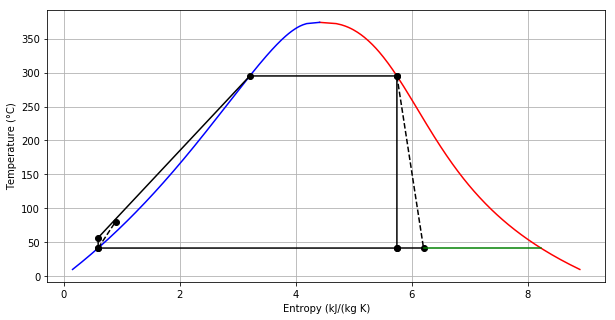

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10.0,5.0))

# saturated vapor and liquid entropy lines 
npt = np.linspace(10,647.096-273.15,200) # range of temperatures
svap = [s for s in [tx2s(t, 1) for t in npt]]
sliq = [s for s in [tx2s(t, 0) for t in npt]]
plt.plot(svap, npt, 'r-')
plt.plot(sliq, npt, 'b-')

t=[t1,t2s,t3,t4s+15]
s=[s1,s2s,s3,s4s]

# point 5
t.append(px2t(p1,0))
s.append(px2s(p1,0))

t.append(t1)
s.append(s1)

plt.plot(s, t, 'ko-')

tb=[t1,t2]
sb=[s1,s2]
plt.plot(sb, tb, 'k--')
tist=[t2,t2s]
sist=[s2,s2s]
plt.plot(sist, tist, 'ko-')

sp=[s3,s3+0.3]
tp=[t3,ps2t(p4,s3+0.3)+15]
plt.plot(sp, tp, 'ko--')

tist=[t2,t2s]
sist=[s2,px2s(p2,1)]
plt.plot(sist, tist, 'g-')

plt.xlabel('Entropy (kJ/(kg K)')
plt.ylabel('Temperature (°C)')
plt.grid()
# The output of a matplotlib plot as an SVG
plt.savefig("./img/rankine82-TS.svg")

#### Display SVG 

```md
![](./img/rankine82-TS.svg)
```
![](./img/rankine82-TS.svg)

## Discussion of Examples 8.1 and 8.2

The effect of irreversibilities within the turbine and pump can be gauged by comparing values from Example 8.2 with their counterparts in Example 8.1. In Example 8.2,
the turbine work per unit of mass is less and the pump work per unit of mass is greater than in Example 8.1, as can be confirmed using data from these examples.
The thermal efficiency in Example 8.2 is less than in the ideal case of Example 8.1 

For a fixed net power output (100 MW), the smaller net work output per unit mass in Example 8.2 dictates a greater mass flow rate of steam than in Example 8.1. The magnitude of the heat transfer to cooling water is also greater in Example 8.2 than in Example 8.1; consequently, a greater mass flow rate of cooling water is required.

## Reference

[Scalable Vector Graphics](https://en.wikipedia.org/wiki/Scalable_Vector_Graphics)